In [12]:

import tensorflow as tf
# tf.enable_eager_execution()
print(tf.__version__)



import numpy as np
from Models import *
from Stacked_Model import *
from utils import *
from sklearn.model_selection import train_test_split

2.0.0


##  Load the data
We consider the OMXS stock data, processed such that X reflects a given day's closing prices, a feature vector of 48 dimensions, with the closing price of the stock if the stock was a constituent of the OMSX on a given date and 0 otherwsie.  Y is the 30 day lookahead value denoted as 0 and 1 if the OMXS decreased or increased respectively.

The dataset considers dates in the range January 1, 2000 to March 3, 2020.

In [13]:
X = np.load('../data/processed/OMXS_processed.npy')
Y = np.load('../data/processed/OMXS_labels.npy')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20)

### We investigate the frequency of label occurance to determine if a balancing is required



Number of decreases: 2216, Number of Increases: 3054


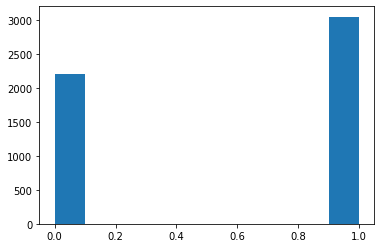

In [12]:
plt.hist(Y)
uniques, counts = np.unique(Y,return_counts=True)
print(f'Number of decreases: {counts[0]}, Number of Increases: {counts[1]}')

### Without incorporating a lookback period

We first explore the performance of models using only the current day's prices.  Thus, the features the models are trained on consists of the day's closing price for each stock consisting the OMXS index for any given date.

####  MLP Results
As displayed, the MLP performs poorly in predicting the lookahead value of the index given the feature vector.  This result is not too surprising considering that the model has one hidden layer with 100 nodes.  Furthermore, the temporal nature of the dataset with shifts market sentiments would mean the underlying drivers behind price movements continues to change making learning difficult for the MLP

Train on 4743 samples, validate on 527 samples
Epoch 1/50
4743/4743 [==============================] - 0s 69us/step - loss: 7.7554 - binary_accuracy: 0.0000e+00 - val_loss: 8.8686 - val_binary_accuracy: 0.0000e+00
Epoch 2/50
4743/4743 [==============================] - 0s 27us/step - loss: 7.7554 - binary_accuracy: 0.0000e+00 - val_loss: 8.8686 - val_binary_accuracy: 0.0000e+00
Epoch 3/50
4743/4743 [==============================] - 0s 26us/step - loss: 7.7554 - binary_accuracy: 0.0000e+00 - val_loss: 8.8686 - val_binary_accuracy: 0.0000e+00
Epoch 4/50
4743/4743 [==============================] - 0s 26us/step - loss: 7.7554 - binary_accuracy: 0.0000e+00 - val_loss: 8.8686 - val_binary_accuracy: 0.0000e+00
Epoch 5/50
4743/4743 [==============================] - 0s 27us/step - loss: 7.7554 - binary_accuracy: 0.0000e+00 - val_loss: 8.8686 - val_binary_accuracy: 0.0000e+00
Epoch 6/50
4743/4743 [==============================] - 0s 22us/step - loss: 7.7554 - binary_accuracy: 0.0000e+00 - va

4743/4743 [==============================] - 0s 18us/step - loss: 7.7554 - binary_accuracy: 0.0000e+00 - val_loss: 8.8686 - val_binary_accuracy: 0.0000e+00
Epoch 50/50
4743/4743 [==============================] - 0s 17us/step - loss: 7.7554 - binary_accuracy: 0.0000e+00 - val_loss: 8.8686 - val_binary_accuracy: 0.0000e+00


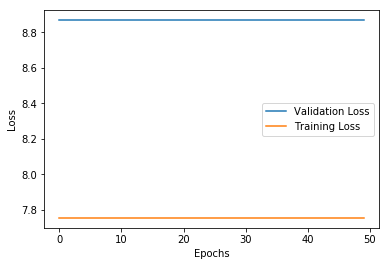

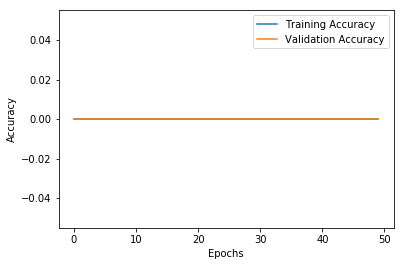

In [14]:
mlp = MLP(100)
run_experiment(mlp, X, Y, epochs = 50)

In [ ]:
mlp=MLP(2000)
run_experiment(mlp,X,Y,epochs=50)

### Deep Feedforward Network

We extend the single hidden MLP into a deep network with three hidden layers, with batch normalization and  dropout after each hidden layer.  As shown below, the network begins to demonstrate some predictive powers but simulatneously unstable learning as shown in the spikes.

In [ ]:
model = Deep_MLP(100)
run_experiment(model, X, Y, epochs = 50)

### LSTM Results

Within the time series literature, LSTMs are reknown for their ability to deal with the vanishing/exploding gradient issue that arises due to taking gradients over time.  As such, LSTMS perform better in dealing with temporal sequences and this is reflected by the performance of the single layer LSTM network.

In [ ]:
lstm = LSTM_(100)
lstm.compile()
lstm.train(X,Y,epochs=50)
lstm.plot()

Train on 4743 samples, validate on 527 samples
Epoch 1/50
 300/4743 [>.............................] - ETA: 37s - loss: 1.1709 - binary_accuracy: 0.3700

/home/yu.bryan.j/.pyenv/versions/tensorflow/lib/python3.8/site-packages/keras/callbacks/callbacks.py:92: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.629503). Check your callbacks.
  warnings.warn(


4743/4743 [==============================] - 12s 3ms/step - loss: 0.7719 - binary_accuracy: 0.5429 - val_loss: 0.7004 - val_binary_accuracy: 0.4250
Epoch 2/50
4743/4743 [==============================] - 9s 2ms/step - loss: 0.6491 - binary_accuracy: 0.6426 - val_loss: 0.7082 - val_binary_accuracy: 0.4250
Epoch 3/50
4743/4743 [==============================] - 9s 2ms/step - loss: 0.6488 - binary_accuracy: 0.6441 - val_loss: 0.6914 - val_binary_accuracy: 0.5503
Epoch 4/50
4743/4743 [==============================] - 9s 2ms/step - loss: 0.6399 - binary_accuracy: 0.6435 - val_loss: 0.7071 - val_binary_accuracy: 0.4250
Epoch 5/50
4743/4743 [==============================] - 10s 2ms/step - loss: 0.6336 - binary_accuracy: 0.6456 - val_loss: 0.6851 - val_binary_accuracy: 0.5617
Epoch 6/50
4743/4743 [==============================] - 9s 2ms/step - loss: 0.6349 - binary_accuracy: 0.6388 - val_loss: 0.6820 - val_binary_accuracy: 0.6376
Epoch 7/50
4743/4743 [==============================] - 9s 2m

### CNN Results

We consider the traditional CNN network, one that has stacked layers of convolution and pooling, topped with a fully connected layer.  We note that the performance in predicting the lookahead value is poor with this network. We speculate a connection between the single layer MLP topping this network whose performance was poor as shown above - and as such, the convolution and max pooling serve as a dimensionality reduction process which proves sufficient to improve performance of an inapproriate network.

Train on 4743 samples, validate on 527 samples
Epoch 1/50
4743/4743 [==============================] - 1s 152us/step - loss: 8.9874 - binary_accuracy: 0.0000e+00 - val_loss: 8.8686 - val_binary_accuracy: 0.0000e+00
Epoch 2/50
1800/4743 [==========>...................] - ETA: 0s - loss: 8.9108 - binary_accuracy: 0.0000e+00

/Users/bryanyu/tensorflow/lib/python3.8/site-packages/keras/callbacks/callbacks.py:843: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: val_loss,val_binary_accuracy,loss,binary_accuracy
  warnings.warn(
/Users/bryanyu/tensorflow/lib/python3.8/site-packages/keras/callbacks/callbacks.py:706: RuntimeWarning: Can save best model only with val_accuracy available, skipping.
  warnings.warn('Can save best model only with %s available, '


4743/4743 [==============================] - 0s 90us/step - loss: 8.9690 - binary_accuracy: 0.0000e+00 - val_loss: 8.8686 - val_binary_accuracy: 0.0000e+00
Epoch 3/50
4743/4743 [==============================] - 0s 62us/step - loss: 8.9467 - binary_accuracy: 0.0000e+00 - val_loss: 8.8686 - val_binary_accuracy: 0.0000e+00
Epoch 4/50
4743/4743 [==============================] - 0s 65us/step - loss: 8.9467 - binary_accuracy: 0.0000e+00 - val_loss: 8.8686 - val_binary_accuracy: 0.0000e+00
Epoch 5/50
4743/4743 [==============================] - 0s 95us/step - loss: 8.9467 - binary_accuracy: 0.0000e+00 - val_loss: 8.8686 - val_binary_accuracy: 0.0000e+00
Epoch 6/50
4743/4743 [==============================] - 0s 68us/step - loss: 8.9467 - binary_accuracy: 0.0000e+00 - val_loss: 8.8686 - val_binary_accuracy: 0.0000e+00
Epoch 7/50
4743/4743 [==============================] - 0s 65us/step - loss: 8.9467 - binary_accuracy: 0.0000e+00 - val_loss: 8.8686 - val_binary_accuracy: 0.0000e+00
Epoch 8/5

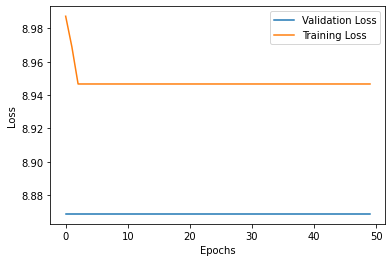

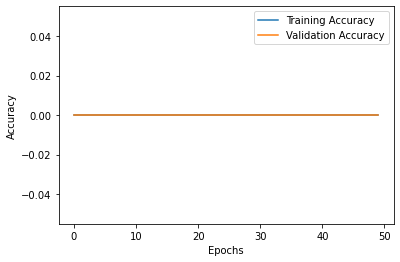

In [3]:
n,d = X.shape
X_CNN = X.reshape((n,d,1))

cnn = CNN()
cnn.compile()
cnn.train(X_CNN,Y, epochs=50)
cnn.plot()

### CNN LSTM Results

Proceding from the CNN results, as we believe the culprit was the MLP, we inserted an LSTM between the CNN and the MLP.  Immediately, we note the network predictive power improves.  Furthermore, the network's performance on the validation set improves as it continues with continued training.

Train on 4743 samples, validate on 527 samples
Epoch 1/50
1300/4743 [=======>......................] - ETA: 5s - loss: 3.8935 - binary_accuracy: 0.4431

/Users/bryanyu/tensorflow/lib/python3.8/site-packages/keras/callbacks/callbacks.py:92: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.205135). Check your callbacks.
  warnings.warn(


4743/4743 [==============================] - 3s 612us/step - loss: 4.5158 - binary_accuracy: 0.3850 - val_loss: 0.8092 - val_binary_accuracy: 0.4194
Epoch 2/50
4743/4743 [==============================] - 1s 159us/step - loss: 2.9324 - binary_accuracy: 0.4858 - val_loss: 0.7599 - val_binary_accuracy: 0.5750
Epoch 3/50
4743/4743 [==============================] - 1s 159us/step - loss: 2.0238 - binary_accuracy: 0.5193 - val_loss: 0.7070 - val_binary_accuracy: 0.5863
Epoch 4/50
4743/4743 [==============================] - 1s 165us/step - loss: 1.6897 - binary_accuracy: 0.5281 - val_loss: 0.7559 - val_binary_accuracy: 0.5560
Epoch 5/50
4743/4743 [==============================] - 1s 225us/step - loss: 1.8351 - binary_accuracy: 0.5353 - val_loss: 0.7067 - val_binary_accuracy: 0.5522
Epoch 6/50
4743/4743 [==============================] - 1s 156us/step - loss: 1.2969 - binary_accuracy: 0.5020 - val_loss: 0.7214 - val_binary_accuracy: 0.5560
Epoch 7/50
4743/4743 [=============================

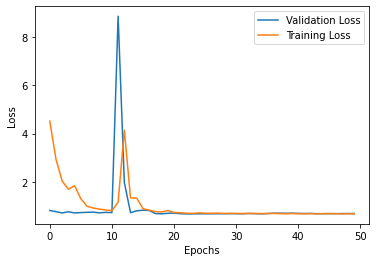

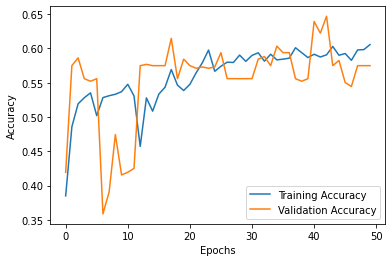

In [6]:
n,d = X.shape
X_CNN = X.reshape((n,d,1))

cnn_lstm = CNN_LSTM()
cnn_lstm.compile()
cnn_lstm.train(X_CNN,Y, epochs=50)
cnn_lstm.plot()

## Stacked Model

We introduce a novel model of stacked LSTM.  The input to the first LSTM is the price vector.  The input to the second LSTM is a stream of price movements as generated from the GAN.  That is, for our lookforward of 90 days, we 

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, None, 1)]    0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 90, 48)]     0                                            
__________________________________________________________________________________________________
lstm_4 (LSTM)                   (None, 32)           4352        input_5[0][0]                    
__________________________________________________________________________________________________
lstm_5 (LSTM)                   (None, 32)           10368       input_6[0][0]                    
____________________________________________________________________________________________

1/0 [=========================================================================================================================================================] - 0s 496ms/step - loss: 0.7967 - binary_accuracy: 0.3984 - val_loss: 0.7923 - val_binary_accuracy: 0.4231
Epoch 23/50
1/0 [=========================================================================================================================================================] - 1s 554ms/step - loss: 0.7759 - binary_accuracy: 0.4023 - val_loss: 0.7703 - val_binary_accuracy: 0.4231
Epoch 24/50
1/0 [=========================================================================================================================================================] - 0s 469ms/step - loss: 0.7489 - binary_accuracy: 0.3906 - val_loss: 0.7496 - val_binary_accuracy: 0.4231
Epoch 25/50
1/0 [=========================================================================================================================================================] - 1s 7

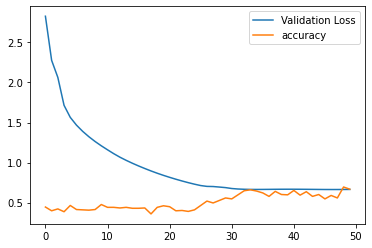

In [15]:
# BUFFER_SIZE = 60000
# noise_dim = X.shape[1]
# gan = GAN_FINANCE(100,output_size=noise_dim, batch_size=256, noise_dim=noise_dim)
# X_gan = copy.deepcopy(X)
# X_gan = tf.data.Dataset.from_tensor_slices(X_gan).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
# gan.train(X_gan, epochs = 100, verbose=False)


"""
Experimental stacked LSTM
"""
number_of_samples, dim = X.shape
lookahead = 90

experimental = Experimental(dim, dim, lookahead, gan)
experimental.compile()
experimental.train(X_train,y_train, X_val, y_val, epochs=50)
experimental.plot()



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, None, 1)]    0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 90, 48)]     0                                            
__________________________________________________________________________________________________
lstm_6 (LSTM)                   (None, 32)           4352        input_7[0][0]                    
__________________________________________________________________________________________________
lstm_7 (LSTM)                   (None, 32)           10368       input_8[0][0]                    
____________________________________________________________________________________________


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Epoch 1/200
1/0 [======================================] - 2s 2s/step - loss: 6.5988 - binary_accuracy: 0.4570 - val_loss: 2.3683 - val_binary_accuracy: 0.4147
Epoch 2/200
1/0 [======================================] - 1s 552ms/step - loss: 2.2826 - binary_accuracy: 0.4141 - val_loss: 1.7628 - val_binary_accuracy: 0.4147
Epoch 3/200
1/0 [======================================] - 1s 538ms/step - loss: 1.4884 - binary_accuracy: 0.4492 - val_loss: 1.5188 - val_binary_accuracy: 0.4147
Epoch 4/200
1/0 [======================================] - 1s 529ms/step - loss: 1.4100 - binary_accuracy: 0.3711 - val_loss: 1.3640 - val_binary_accuracy: 0.4147
Epoch 5/200
1/0 [======================================] - 1s 538ms/step - loss: 1.1649 - binary_accuracy: 0.4258 - val_loss: 1.2521 - val_binary_accuracy: 0.4147
Epoch 6/200
1/0 [======================================] - 1s 518ms/step - loss: 1.1026 - binary_accuracy: 0.3867 - val_loss: 1.1648 - val_binary_accuracy: 0.4147
Epoch 7/200
1/0 [========

1/0 [======================================] - 1s 559ms/step - loss: 0.6588 - binary_accuracy: 0.6367 - val_loss: 0.7378 - val_binary_accuracy: 0.4396
Epoch 52/200
1/0 [======================================] - 1s 529ms/step - loss: 0.6692 - binary_accuracy: 0.6133 - val_loss: 0.7363 - val_binary_accuracy: 0.4408
Epoch 53/200
1/0 [======================================] - 1s 518ms/step - loss: 0.6743 - binary_accuracy: 0.5820 - val_loss: 0.7347 - val_binary_accuracy: 0.4467
Epoch 54/200
1/0 [======================================] - 1s 521ms/step - loss: 0.6649 - binary_accuracy: 0.5977 - val_loss: 0.7326 - val_binary_accuracy: 0.4538
Epoch 55/200
1/0 [======================================] - 1s 543ms/step - loss: 0.6670 - binary_accuracy: 0.5781 - val_loss: 0.7302 - val_binary_accuracy: 0.4645
Epoch 56/200
1/0 [======================================] - 1s 528ms/step - loss: 0.6738 - binary_accuracy: 0.5898 - val_loss: 0.7278 - val_binary_accuracy: 0.4692
Epoch 57/200
1/0 [===========

1/0 [======================================] - 1s 592ms/step - loss: 0.6608 - binary_accuracy: 0.5977 - val_loss: 0.6994 - val_binary_accuracy: 0.4870
Epoch 102/200
1/0 [======================================] - 1s 568ms/step - loss: 0.6591 - binary_accuracy: 0.5859 - val_loss: 0.6980 - val_binary_accuracy: 0.4905
Epoch 103/200
1/0 [======================================] - 1s 606ms/step - loss: 0.6319 - binary_accuracy: 0.6445 - val_loss: 0.6961 - val_binary_accuracy: 0.4882
Epoch 104/200
1/0 [======================================] - 1s 735ms/step - loss: 0.6654 - binary_accuracy: 0.6055 - val_loss: 0.6944 - val_binary_accuracy: 0.4834
Epoch 105/200
1/0 [======================================] - 1s 552ms/step - loss: 0.6649 - binary_accuracy: 0.5781 - val_loss: 0.6936 - val_binary_accuracy: 0.4834
Epoch 106/200
1/0 [======================================] - 1s 557ms/step - loss: 0.6563 - binary_accuracy: 0.6055 - val_loss: 0.6934 - val_binary_accuracy: 0.4834
Epoch 107/200
1/0 [=====

Epoch 151/200
1/0 [======================================] - 1s 564ms/step - loss: 0.6587 - binary_accuracy: 0.5938 - val_loss: 0.6864 - val_binary_accuracy: 0.5190
Epoch 152/200
1/0 [======================================] - 1s 567ms/step - loss: 0.6285 - binary_accuracy: 0.6406 - val_loss: 0.6854 - val_binary_accuracy: 0.5308
Epoch 153/200
1/0 [======================================] - 1s 558ms/step - loss: 0.6964 - binary_accuracy: 0.5352 - val_loss: 0.6870 - val_binary_accuracy: 0.5130
Epoch 154/200
1/0 [======================================] - 1s 555ms/step - loss: 0.6581 - binary_accuracy: 0.6094 - val_loss: 0.6887 - val_binary_accuracy: 0.5012
Epoch 155/200
1/0 [======================================] - 1s 567ms/step - loss: 0.6406 - binary_accuracy: 0.6211 - val_loss: 0.6906 - val_binary_accuracy: 0.4905
Epoch 156/200
1/0 [======================================] - 1s 537ms/step - loss: 0.6372 - binary_accuracy: 0.6172 - val_loss: 0.6920 - val_binary_accuracy: 0.4858
Epoch 157/

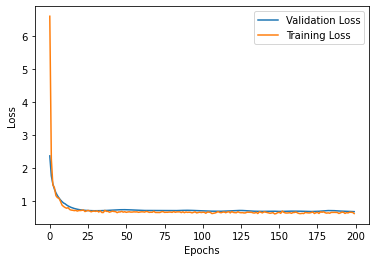

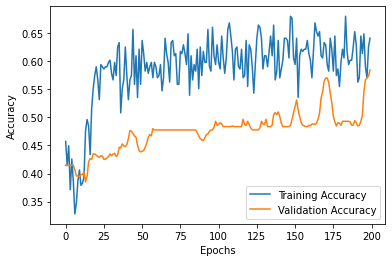

In [10]:
"""
GAN
"""
BUFFER_SIZE = 60000
BATCH_SIZE=256
noise_dim = X.shape[1]
gan = GAN_FINANCE(100,output_size=noise_dim, batch_size=BATCH_SIZE, noise_dim=noise_dim)
X_gan = copy.deepcopy(X_train)
X_gan = tf.data.Dataset.from_tensor_slices(X_gan).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
gan.train(X_gan, epochs = 50, verbose=False)

"""
Experimental stacked LSTM
"""

number_of_samples, dim = X.shape
lookahead = 90

experimental = Experimental(dim, dim, lookahead, gan)
experimental.compile()
experimental.train(X_train, y_train, X_val, y_val, epochs=200)
experimental.plot()
